In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('precision', 1)

folder = './032018_48hrs/'

path = folder + 'Cytoplasm.xlsx'

tabs = ['BT474,Cntrl(rb,c2-4)', 
        'BT474,30nM(rb,c5-7)',
        'BT474,300nM(rb,c8-10)',
        
        'BT474+C3H-scr,Cntrl(rc,c2-4)',
        'BT474+C3H-scr,30nM(rc,c5-7)',
        'BT474+C3H-scr,300nM(rc,c8-10)',
        
        'BT474+C3H-1,Cntrl(rd,c2-4)',
        'BT474+C3H-1,30nM(rd,c5-7)',
        'BT474+C3H-1,300nM(rd,c8-10)',
        
        'BT474+C3H-3,Cntrl(re,c2-4)',
        'BT474+C3H-3,30nM(re,c5-7)',
        'BT474+C3H-3,300nM(re,c8-10)']

In [2]:
dt = []
for t in tabs:
    dt.append(pd.read_excel(open(path, 'rb'), sheet_name=t))
df = pd.concat(dt, ignore_index=True)
df['Row'] = df['Well'].apply(lambda x: x[0])
df

,Cell ID,Well,Field,Group,Nucleus (Cycle 1 - DAPI),BT474-H2BeGFP (Cycle 1 - FITC),MCL1 (Cycle 2 - Cy3),p-p65NFkB (Cycle 2 - Cy5),p-Akt (Cycle 3 - FITC),aSMA (Cycle 3 - Cy3),p-gH2AX (Cycle 3 - Cy5),GRP78 (Cycle 4 - FITC),Vimentin (Cycle 4 - Cy3),Row
0,11100010018,B02,1,0,6.1e+05,34418.9,54596.2,25364.8,28330.5,54596.2,1913.7,9510.9,13633.8,B
1,11100020013,B02,1,0,1.4e+06,311103.3,101851.6,43709.0,73056.7,101851.6,6120.7,16078.1,12079.2,B
2,11100030022,B02,1,0,1.9e+06,162176.2,183881.8,104492.1,206216.4,183881.8,23716.0,23564.9,31449.9,B
3,11100040016,B02,1,0,1.3e+06,538824.0,84439.7,45970.9,70549.5,84439.7,1426.4,20359.0,16116.3,B
4,11100050019,B02,1,0,1.3e+06,217196.1,58911.0,26316.6,27367.7,58911.0,2993.7,17980.0,21591.7,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343804,49911711034,E10,9,2,2.2e+05,16640.2,44580.2,4733.4,27072.3,44580.2,8104.0,7305.9,17668.4,E
343805,49911721034,E10,9,2,2.5e+05,96468.8,40339.2,16100.2,26939.8,40339.2,10418.5,12620.9,15018.5,E
343806,49911731035,E10,9,2,2.9e+05,162932.7,30150.8,46467.5,29489.4,30150.8,9917.5,12035.9,19004.7,E
343807,49911741036,E10,9,2,2.3e+05,13803.6,35212.8,7303.4,17433.2,35212.8,2545.4,6376.2,16880.5,E


In [3]:
# All columns in the dataset's information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343809 entries, 0 to 343808
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Cell ID                         343809 non-null  int64  
 1   Well                            343809 non-null  object 
 2   Field                           343809 non-null  int64  
 3   Group                           343809 non-null  int64  
 4   Nucleus (Cycle 1 - DAPI)        343809 non-null  float64
 5   BT474-H2BeGFP (Cycle 1 - FITC)  343809 non-null  float64
 6   MCL1 (Cycle 2 - Cy3)            343809 non-null  float64
 7   p-p65NFkB (Cycle 2 - Cy5)       343809 non-null  float64
 8   p-Akt (Cycle 3 - FITC)          343809 non-null  float64
 9   aSMA (Cycle 3 - Cy3)            343809 non-null  float64
 10  p-gH2AX (Cycle 3 - Cy5)         343809 non-null  float64
 11  GRP78 (Cycle 4 - FITC)          343809 non-null  float64
 12  Vimentin (Cycle 

In [4]:
# Check if duplicate ID exists
df['Cell ID'].value_counts()

34402740219    1
27101770195    1
39511140816    1
22712420820    1
22508470741    1
              ..
26712220974    1
38713750836    1
22712470835    1
29905630570    1
48907010612    1
Name: Cell ID, Length: 343809, dtype: int64

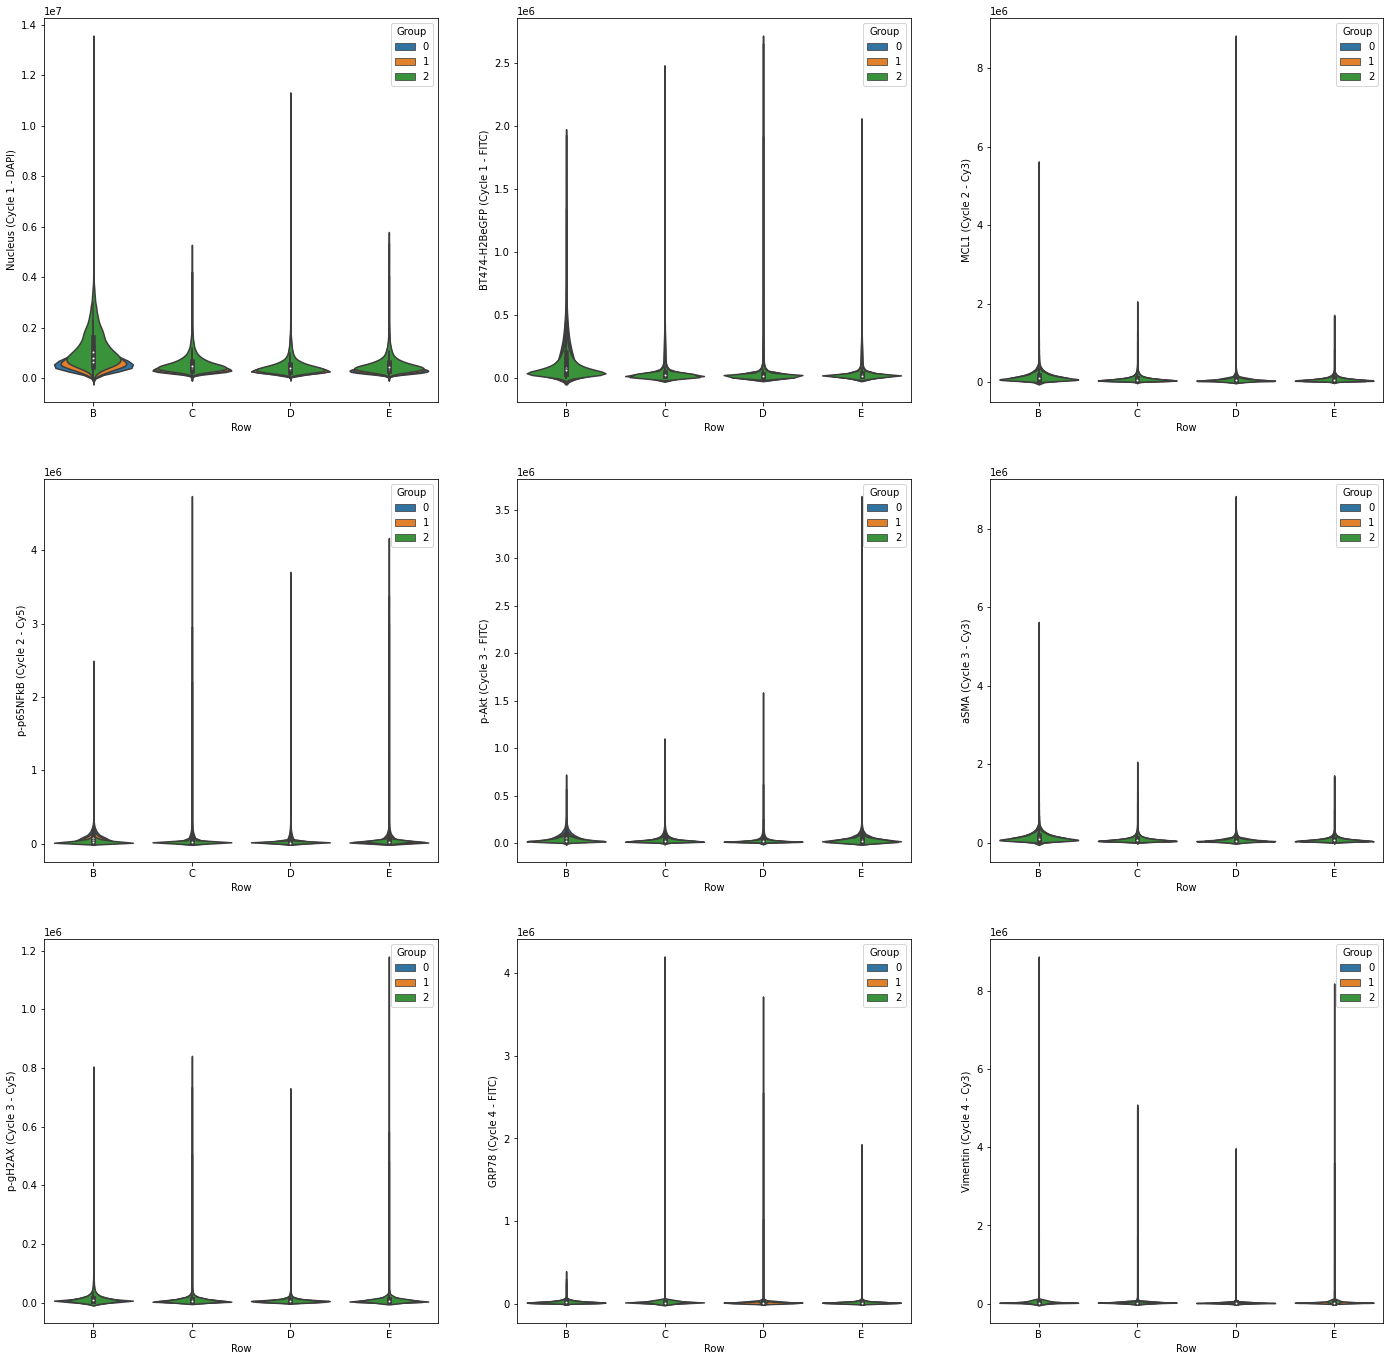

In [5]:
# Plot a grids of plots
fig, axes = plt.subplots(3, 3, figsize=(24, 24))
cols = df.columns[4:13]
for k in range(9):
    sns.violinplot(data=df, 
                   x='Row', 
                   y=cols[k], 
                   hue='Group', 
                   dodge=False, 
                   ax=axes[k // 3][k % 3])
    
plt.show()

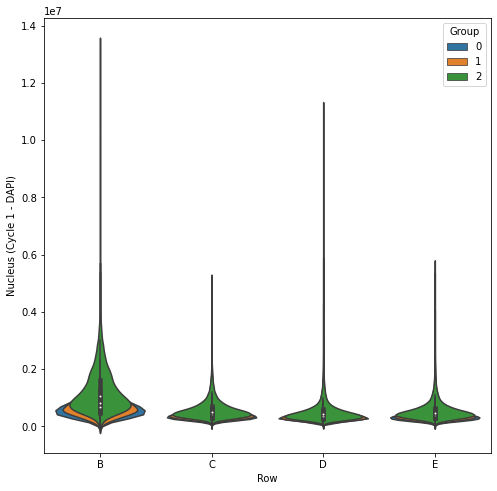

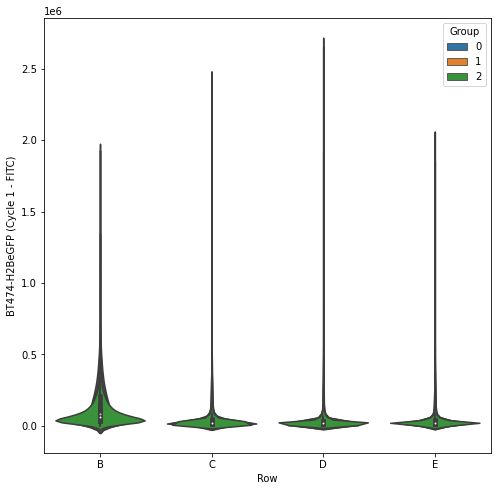

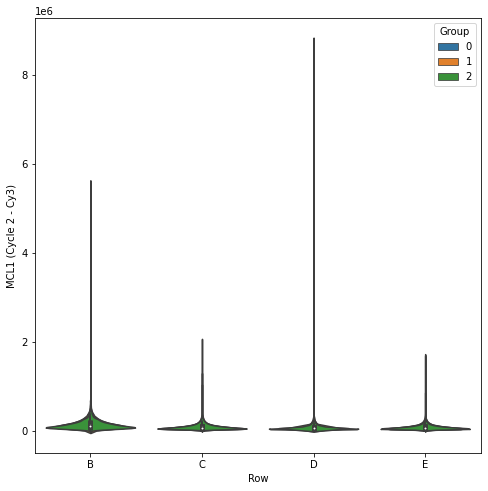

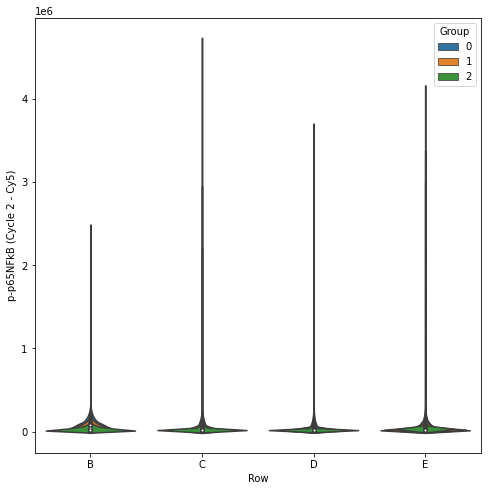

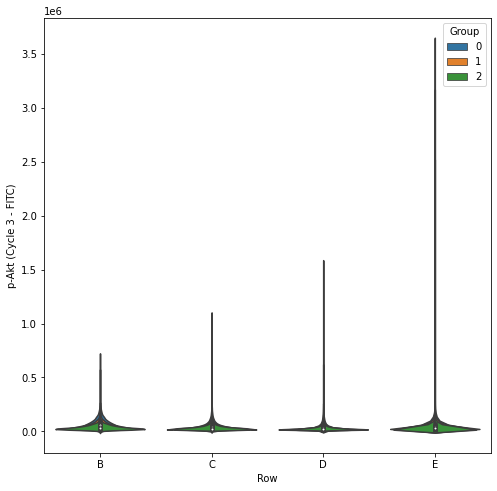

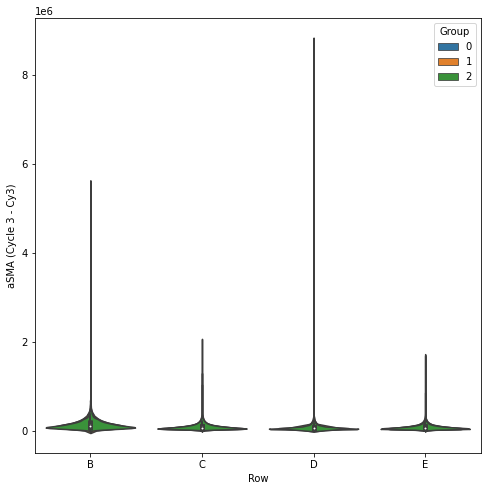

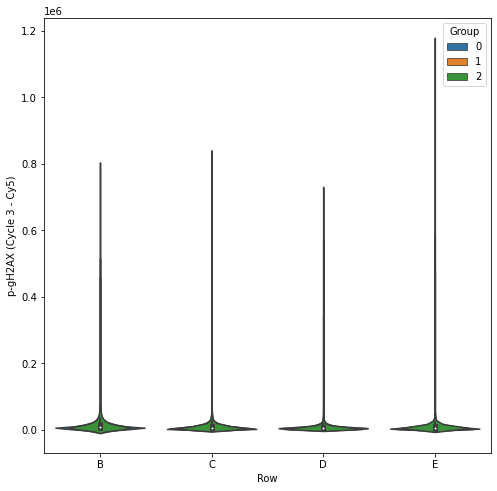

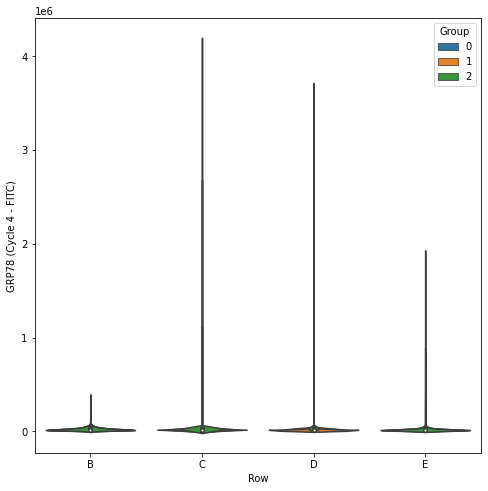

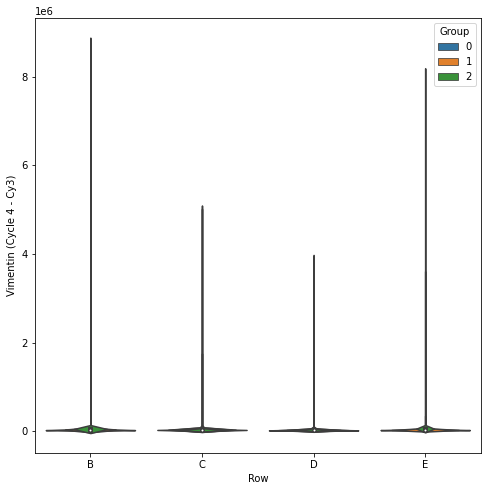

In [6]:
# Plot individual plot
for k in range(9):
    plt.gcf().set_size_inches(8, 8) 
    sns.violinplot(data=df, 
                   x='Row', 
                   y=cols[k], 
                   hue='Group', 
                   dodge=False)
    plt.show()